<a href="https://colab.research.google.com/github/Alphaskakuko/ADS-Assignment-2-3/blob/main/Fashion_MNIST_with_Python_Keras_and_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# To load the mnist data
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential

# importing various types of hidden layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Adam optimizer for better LR and less loss
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Split the data into training and testing
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Print the dimensions of the dataset
print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)


4422102/4422102 [==============================] - 0s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


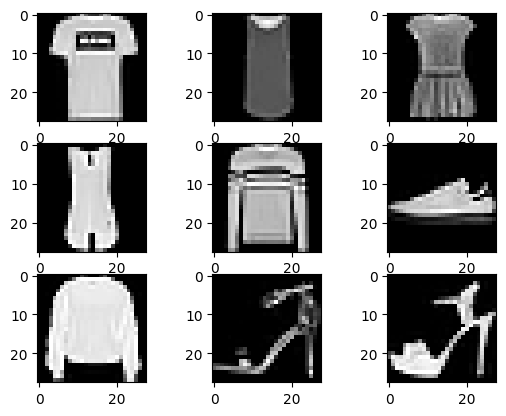

In [4]:
for i in range(1, 10):
	# Create a 3x3 grid and place the
	# image in ith position of grid
	plt.subplot(3, 3, i)
	# Insert ith image with the color map 'grap'
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

# Display the entire plot
plt.show()


In [5]:
trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

print(trainX.shape)


(60000, 28, 28, 1)


In [6]:
def model_arch():
	models = Sequential()
	
	# We are learning 64
	# filters with a kernel size of 5x5
	models.add(Conv2D(64, (5, 5),
					padding="same",
					activation="relu",
					input_shape=(28, 28, 1)))
	
	# Max pooling will reduce the
	# size with a kernel size of 2x2
	models.add(MaxPooling2D(pool_size=(2, 2)))
	models.add(Conv2D(128, (5, 5), padding="same",
					activation="relu"))
	
	models.add(MaxPooling2D(pool_size=(2, 2)))
	models.add(Conv2D(256, (5, 5), padding="same",
					activation="relu"))
	
	models.add(MaxPooling2D(pool_size=(2, 2)))
	
	# Once the convolutional and pooling
	# operations are done the layer
	# is flattened and fully connected layers
	# are added
	models.add(Flatten())
	models.add(Dense(256, activation="relu"))
	
	# Finally as there are total 10
	# classes to be added a FCC layer of
	# 10 is created with a softmax activation
	# function
	models.add(Dense(10, activation="softmax"))
	return models


In [7]:
model = model_arch()

model.compile(optimizer=Adam(learning_rate=1e-3),
			loss='sparse_categorical_crossentropy',
			metrics=['sparse_categorical_accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 256)        0

In [8]:
history = model.fit(
	trainX.astype(np.float32), trainy.astype(np.float32),
	epochs=10,
	steps_per_epoch=100,
	validation_split=0.33
)


Epoch 1/10
100/100 [==============================] - 20s 74ms/step - loss: 2.8249 - sparse_categorical_accuracy: 0.7216 - val_loss: 0.3755 - val_sparse_categorical_accuracy: 0.8637
Epoch 2/10
100/100 [==============================] - 5s 53ms/step - loss: 0.3427 - sparse_categorical_accuracy: 0.8762 - val_loss: 0.3337 - val_sparse_categorical_accuracy: 0.8793
Epoch 3/10
100/100 [==============================] - 6s 61ms/step - loss: 0.2804 - sparse_categorical_accuracy: 0.8984 - val_loss: 0.2992 - val_sparse_categorical_accuracy: 0.8926
Epoch 4/10
100/100 [==============================] - 5s 50ms/step - loss: 0.2439 - sparse_categorical_accuracy: 0.9116 - val_loss: 0.2832 - val_sparse_categorical_accuracy: 0.8980
Epoch 5/10
100/100 [==============================] - 6s 60ms/step - loss: 0.2107 - sparse_categorical_accuracy: 0.9224 - val_loss: 0.2846 - val_sparse_categorical_accuracy: 0.8985
Epoch 6/10
100/100 [==============================] - 5s 51ms/step - loss: 0.1877 - sparse_cat

In [9]:
model.save_weights('./model.h5', overwrite=True)


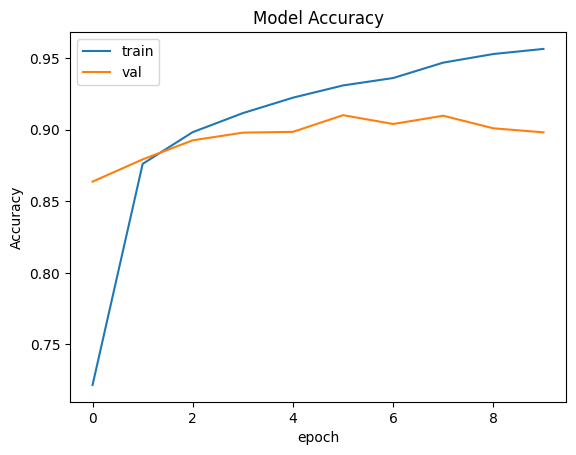

In [10]:
# Accuracy vs Epoch plot
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


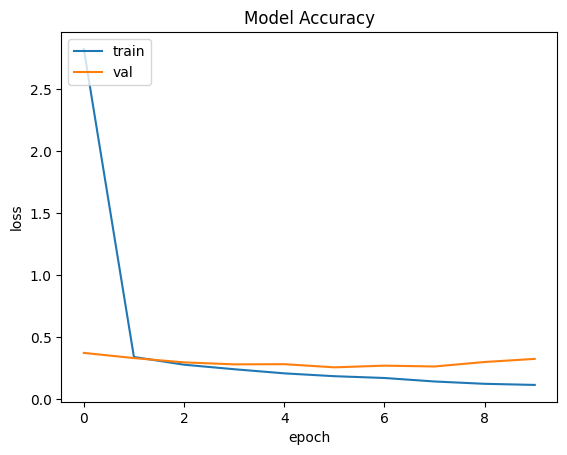

In [11]:
# Loss vs Epoch plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 274ms/step
ankle_boots


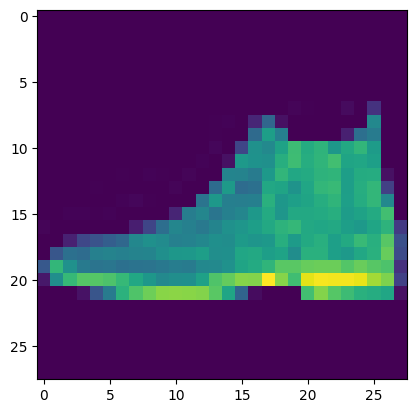

In [12]:
# There are 10 output labels for the Fashion MNIST dataset
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
		'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
# Make a prediction
predictions = model.predict(testX[:1])
label = labels[np.argmax(predictions)]

print(label)
plt.imshow(testX[:1][0])
plt.show()